In [1]:
import torch
from torch import nn
import sys
import separatrix_locator
# sys.path.append("../")
from .src.dynamics.base import DynamicalSystem
# from src.core.models import ResNet

# from src.core.separatrix_locator import SeparatrixLocator
# from src.core.models import ResNet

ModuleNotFoundError: No module named 'separatrix_locator.core'

In [21]:
class SineWave1D(DynamicalSystem):
    def __init__(self):
        super().__init__(dim=1, name="SineWave1D")

    def function(self, x: torch.Tensor) -> torch.Tensor:
        # x shape: (batch, 1)
        return torch.sin(x)


dynamics = SineWave1D()

# models = ResNet(
#     input_dim=dynamics.dim,
#     hidden_size=400,
#     num_layers=20,
#     output_dim=1,
#     input_scale_factor=1,
# ).to("cuda")

models = nn.Sequential(
    nn.Linear(dynamics.dim, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 1)
)#.to("cuda")

locator = SeparatrixLocator(
    dynamics_dim=dynamics.dim,
    models=[models],
    epochs=200,
    # device="cuda",
    verbose=True,
)

# Choose a sampling distribution for initial conditions (mean 0, std 1)
# distribution = torch.distributions.Uniform(low=torch.tensor([-4.0],device="cuda"), high=torch.tensor([4.0],device="cuda"))
distribution = torch.distributions.Uniform(low=torch.tensor([-4.0]), high=torch.tensor([4.0]))

# Train models to learn Koopman eigenfunctions
locator.fit(dynamics.function, distribution)

# # Prepare for gradient-based refinement and find separatrix
# locator.prepare_models_for_gradient_descent(init_dist)
# trajectories, separatrix_points = locator.find_separatrix(init_dist)

Training 1 models...
Training model 1/10
Epoch 0, Loss: 0.8867836594581604, Normalised losses: [0.8787226676940918], Regularisation term values: [], Balance losses: [0.8060987591743469], param norm: 19.41217613220215, Learning Rate: 0.0001, len(model.parameters()): 6, 
Epoch 10, Loss: 0.7419480085372925, Normalised losses: [0.7416210770606995], Regularisation term values: [], Balance losses: [0.032693054527044296], param norm: 1.6236085891723633, Learning Rate: 0.0001, len(model.parameters()): 6, 
Epoch 20, Loss: 0.6409708857536316, Normalised losses: [0.6401911973953247], Regularisation term values: [], Balance losses: [0.07796623557806015], param norm: 2.9004979133605957, Learning Rate: 0.0001, len(model.parameters()): 6, 
Epoch 30, Loss: 0.5610579252243042, Normalised losses: [0.5599492192268372], Regularisation term values: [], Balance losses: [0.11086893826723099], param norm: 6.651190280914307, Learning Rate: 0.0001, len(model.parameters()): 6, 
Epoch 40, Loss: 0.0663353428244590

SeparatrixLocator(epochs=200,
                  models=[Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Tanh()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): Tanh()
  (4): Linear(in_features=100, out_features=1, bias=True)
)],
                  verbose=True)

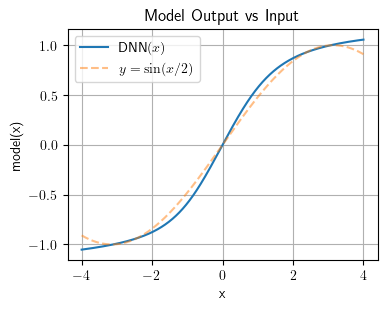

In [19]:
model = locator.models[0]
model.to('cpu')
import numpy as np
import matplotlib.pyplot as plt

x = torch.linspace(-4, 4, 1000)[:,None]
with torch.no_grad():
    y = model(x)

plt.figure(figsize=(4,3))
plt.plot(x, y, label=r'$\text{DNN}(x)$')
plt.plot(x, torch.sin(x/2), '--', label=r'$y=\sin(x/2)$', alpha=0.5)

plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('model(x)')
plt.title('Model Output vs Input')
plt.show()



In [3]:
torch.nn.Linear(dynamics.dim, 1)

Linear(in_features=1, out_features=1, bias=True)

In [4]:
dynamics.name

'CubicBistable1D'